In [1]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science J.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 1.09 s, sys: 289 ms, total: 1.38 s
Wall time: 2.97 s


,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/10/2023 20:13:46,putud2179@gmail.com,Dewa Putu Krisna Julianggara,1,VII J,Dewa Putu Krisna Julianggara,1,I Ketut Derren Sentana Yoga,Dia baik,I Kadek Radika Adi Pramana,Dia marah kalo di enjek balik,I Kadek Radika Adi Pramana,Selalu mengejek
1,5/10/2023 20:12:43,kevinjelek633@gmail.com,I Gede Kevin Ananta Putra,2,VII J,I Wayan Ariel Restu Setana,Dia Gak Baperan,I Wayan Editya Reisya Artha,Sering ngajak buat tugas bareng,I Komang Robert Awidiya Anggara,Dia marah kalau di ejek balik,I Kadek Radika Adi Pramana,Dia selalu nampar nampar punggung
2,5/11/2023 21:06:43,putudewidewisri@gmail.com,I Kadek Agus Pande Suratmaja,3,VII J,I Wayan Ariel Restu Setana,Ramah,I Kadek Rupawan,Peduli,Ni Luh Komang Sri Anggraeni Kristina Dewi,Cerewet,Ni Putu Dewi Anggreni,Sok
3,6/23/2023 20:33:07,nikomangsulastriasih@gmail.com,I Kadek Andika,4,VII J,I Made Wisnu Setyadi,seru kalau diajak bercanda,I Nyoman Mahesa Valjunata,karena dia baik,I Wayan Reyga Artha Wiguna,sombong,Pande Putu Febryandika Putra,karea dia receh
4,5/8/2023 22:32:04,adinata0876@gmail.com,I Kadek Krisnata Adiarta,5,VII J,I Kadek Mardilan Dinata,"Karena saya suka dengan dia , dengan pembicara...",I Made Wahyu Parta Winaya,Karena dia selalu membantu saya,I Wayan Reyga Artha Wiguna,Dia asik dan tidak pemalss,I Wayan Sudiatmika,Dia baikk dan asik
5,6/23/2023 20:35:11,nikomangsulastriasih@gmail.com,I Kadek Mardilan Dinata,6,VII J,I Made Wahyu Parta Winaya,suka buat saya tertawa dan orangnya baik,I Wayan Reyga Artha Wiguna,"orangnya baik, meski agak sombong",Ni Kadek Meyla Pradipta Putri,suka ribut dikelas,Ni Luh Komang Sri Anggraeni Kristina Dewi,suka cari perhatian di kelas
6,5/15/2023 18:12:44,radikakadek4@gmail.com,I Kadek Radika Adi Pramana,7,VII J,I Wayan Ariel Restu Setana,Tidak suka mengejek,I Made Wahyu Parta Winaya,Sering mengejek,I Made Wahyu Parta Winaya,Sering mengejek,I Made Wahyu Parta Winaya,Sering mengejek
7,6/23/2023 20:36:48,nikomangsulastriasih@gmail.com,I Kadek Rupawan,8,VII J,I Gede Kevin Ananta Putra,karena dia baik,I Made Wahyu Parta Winaya,karena membuat tertawa,Ni Kadek Meyla Pradipta Putri,karena sering ribut di kelas,Ni Luh Komang Sri Anggraeni Kristina Dewi,karena cerewet
8,5/10/2023 8:48:26,derrenketut3@gmail.com,I Ketut Derren Sentana Yoga,9,VII J,Dewa Putu Krisna Julianggara,"asik, dan bisa di ajak bercanda",Dewa Putu Krisna Julianggara,"asik, dan bisa di ajak bercanda",I Gede Kevin Ananta Putra,tidak suka dengan caranya berteman,I Gede Kevin Ananta Putra,tidak suka dengan cara dan sikap nya dalam ber...
9,5/13/2023 18:32:08,madepada1@gmail.com,I Ketut Gede Dony Wiratama,10,VII J,I Wayan Sudiatmika,Baik,I Wayan Ariel Restu Setana,Pintar dan baik,I Kadek Krisnata Adiarta,Jahil,I Kadek Radika Adi Pramana,Suka yontek


In [2]:
%%time
# Pemeriksaan data awal

print(df.head())

            Timestamp                   Email Address  \
0  5/10/2023 20:13:46             putud2179@gmail.com   
1  5/10/2023 20:12:43         kevinjelek633@gmail.com   
2  5/11/2023 21:06:43       putudewidewisri@gmail.com   
3  6/23/2023 20:33:07  nikomangsulastriasih@gmail.com   
4   5/8/2023 22:32:04           adinata0876@gmail.com   

                   NAMA LENGKAP  NO ABSEN  KELAS  \
0  Dewa Putu Krisna Julianggara         1  VII J   
1     I Gede Kevin Ananta Putra         2  VII J   
2  I Kadek Agus Pande Suratmaja         3  VII J   
3                I Kadek Andika         4  VII J   
4      I Kadek Krisnata Adiarta         5  VII J   

  1. Teman anda yang paling anda sukai di kelas  \
0                  Dewa Putu Krisna Julianggara   
1                    I Wayan Ariel Restu Setana   
2                    I Wayan Ariel Restu Setana   
3                          I Made Wisnu Setyadi   
4                       I Kadek Mardilan Dinata   

                                     

In [3]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 3.96 ms, sys: 793 µs, total: 4.75 ms
Wall time: 4.62 ms


In [4]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 1.42 ms, sys: 774 µs, total: 2.2 ms
Wall time: 1.56 ms


In [5]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data J.csv', index=False)

CPU times: user 9.77 ms, sys: 7.68 ms, total: 17.5 ms
Wall time: 34.6 ms


In [6]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 1.09 ms, sys: 1.48 ms, total: 2.57 ms
Wall time: 1.23 ms


In [7]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 472 µs, sys: 503 µs, total: 975 µs
Wall time: 500 µs


In [8]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 19.9 ms, sys: 1.77 ms, total: 21.7 ms
Wall time: 43.2 ms


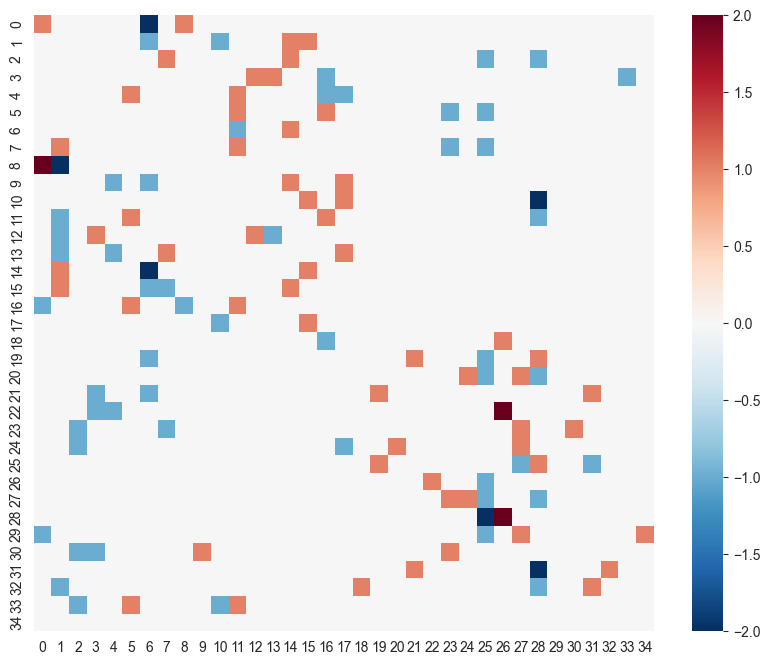

CPU times: user 3.88 s, sys: 232 ms, total: 4.11 s
Wall time: 9.63 s


In [9]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [10]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 5.06 ms, sys: 3.26 ms, total: 8.33 ms
Wall time: 16.5 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

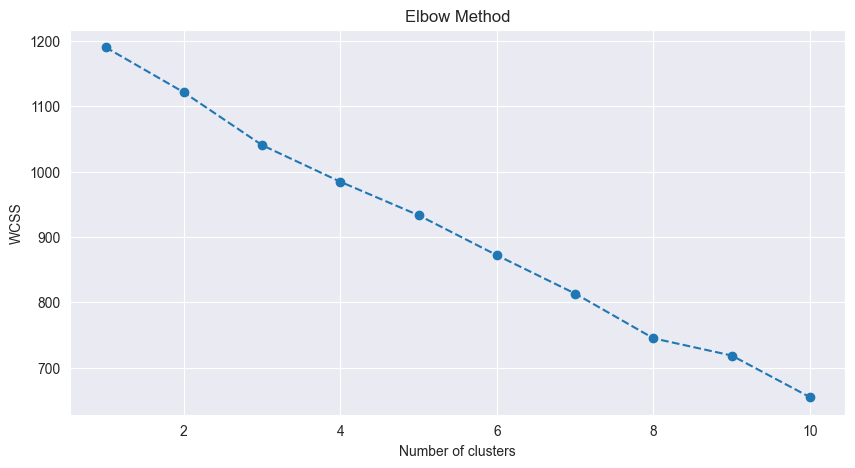

CPU times: user 3.72 s, sys: 421 ms, total: 4.14 s
Wall time: 3.89 s


In [11]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 129 ms, sys: 19.5 ms, total: 149 ms
Wall time: 80.3 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
%%time


print(len(df))
print(len(clustered_students))


35
35
CPU times: user 4.07 ms, sys: 469 µs, total: 4.54 ms
Wall time: 1.12 ms


In [14]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

            Timestamp                   Email Address  \
0  5/10/2023 20:13:46             putud2179@gmail.com   
1  5/10/2023 20:12:43         kevinjelek633@gmail.com   
2  5/11/2023 21:06:43       putudewidewisri@gmail.com   
3  6/23/2023 20:33:07  nikomangsulastriasih@gmail.com   
4   5/8/2023 22:32:04           adinata0876@gmail.com   

                   NAMA LENGKAP  NO ABSEN  KELAS  \
0  Dewa Putu Krisna Julianggara         1  VII J   
1     I Gede Kevin Ananta Putra         2  VII J   
2  I Kadek Agus Pande Suratmaja         3  VII J   
3                I Kadek Andika         4  VII J   
4      I Kadek Krisnata Adiarta         5  VII J   

  1. Teman anda yang paling anda sukai di kelas  \
0                  Dewa Putu Krisna Julianggara   
1                    I Wayan Ariel Restu Setana   
2                    I Wayan Ariel Restu Setana   
3                          I Made Wisnu Setyadi   
4                       I Kadek Mardilan Dinata   

                                     

In [15]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



35
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [16]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 319 µs, sys: 72 µs, total: 391 µs
Wall time: 378 µs


In [17]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp               Email Address  \
16  5/12/2023 10:17:37         ooj451669@gmail.com   
23   5/8/2023 17:47:27       kadekmeyla5@gmail.com   
24   5/8/2023 18:27:38  wulannoktavianti@gmail.com   
29   5/15/2023 8:09:35  niputuniswara862@gmail.com   

                     NAMA LENGKAP  NO ABSEN  KELAS  \
16     I Wayan Reyga Artha Wiguna        17  VII J   
23  Ni Kadek Meyla Pradipta Putri        24  VII J   
24      Ni Kadek Wulan Oktavianti        25  VII J   
29                Ni Putu Niswara        30  VII J   

   1. Teman anda yang paling anda sukai di kelas  \
16                       I Kadek Mardilan Dinata   
23                  Ni Putu Vica Wigi Prameswari   
24               Ni Nyoman Niken Ayu Kirana Dewi   
29                         Putu Ayu Indira Putri   

                                               Alasan  \
16         Suka Random dan gak baper di ajak bercanda   
23  saya dan vica sering jalan jalan bersama dan s...   
24                        

In [18]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 76 µs, sys: 61 µs, total: 137 µs
Wall time: 148 µs


In [19]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 10 ms, sys: 1.29 ms, total: 11.3 ms
Wall time: 20.9 ms


In [20]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 13.7 ms, sys: 2.28 ms, total: 16 ms
Wall time: 24.6 ms


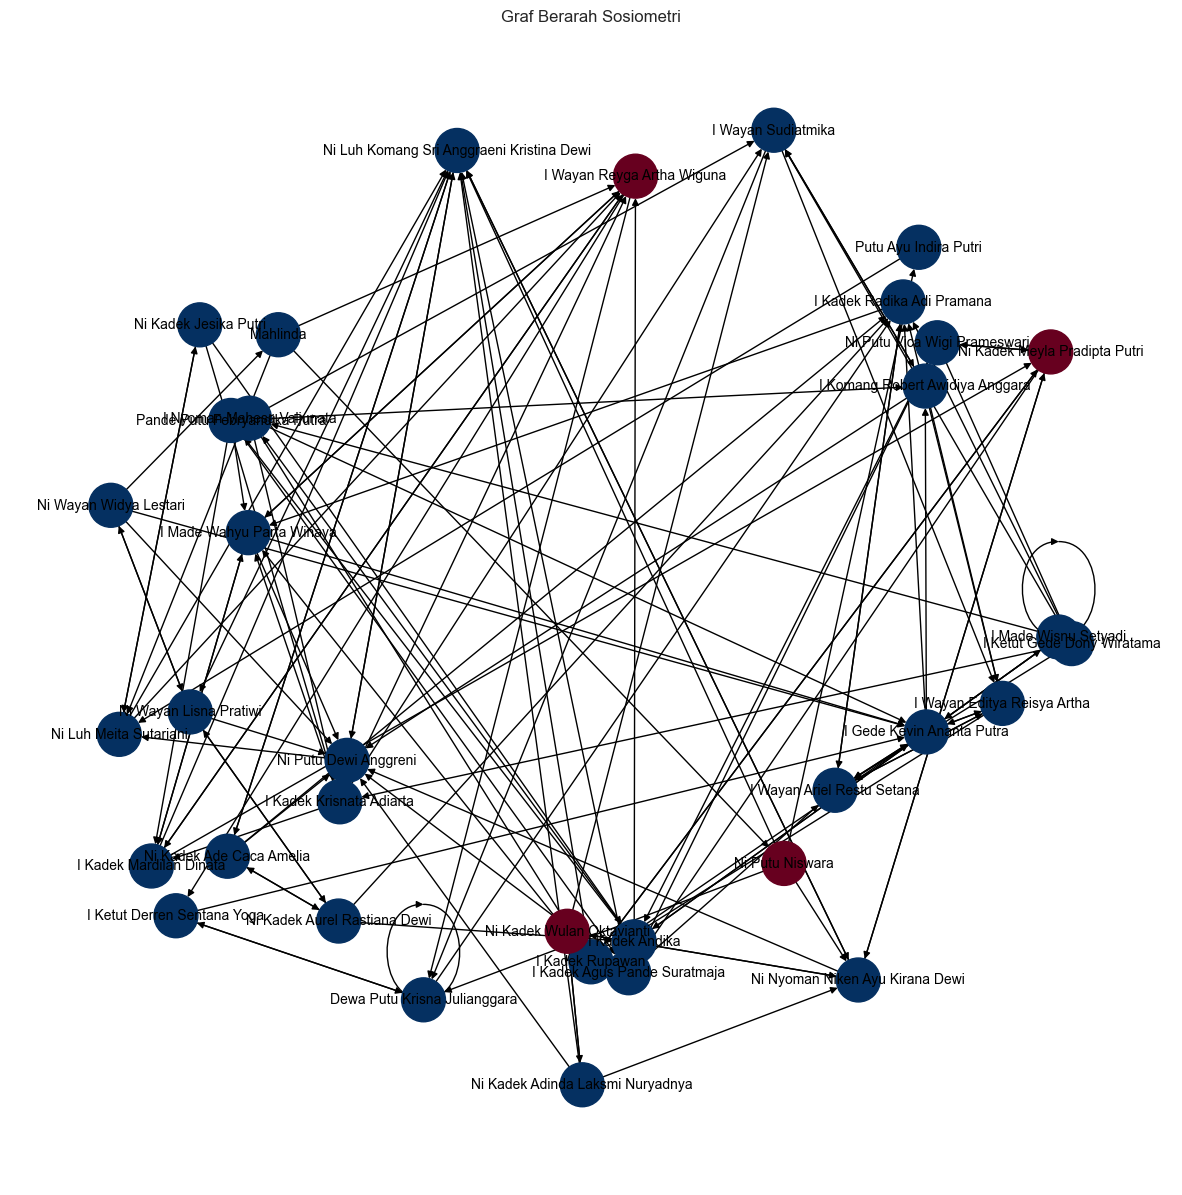

CPU times: user 3.97 s, sys: 301 ms, total: 4.27 s
Wall time: 5.99 s


In [21]:
%%time
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [22]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 376 µs, sys: 17 µs, total: 393 µs
Wall time: 403 µs


In [23]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 9.26 ms, sys: 3.76 ms, total: 13 ms
Wall time: 16.6 ms


In [24]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
             Timestamp                   Email Address  \
14   5/8/2023 18:01:12          arielaurel22@gmail.com   
11  5/15/2023 11:07:44    madewahyukedewatan@gmail.com   
15  5/10/2023 20:24:45          arielaurel22@gmail.com   
5   6/23/2023 20:35:11  nikomangsulastriasih@gmail.com   
27  5/11/2023 18:41:19             mingiken2@gmail.com   

                       NAMA LENGKAP  NO ABSEN  KELAS  \
14       I Wayan Ariel Restu Setana        15  VII J   
11        I Made Wahyu Parta Winaya        12  VII J   
15      I Wayan Editya Reisya Artha        16  VII J   
5           I Kadek Mardilan Dinata         6  VII J   
27  Ni Nyoman Niken Ayu Kirana Dewi        28  VII J   

   1. Teman anda yang paling anda sukai di kelas  \
14                   I Wayan Editya Reisya Artha   
11                       I Kadek Mardilan Dinata   
15                    I Wayan Ariel Restu Setana   
5                      I Made Wahyu Parta Winaya   
27               

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


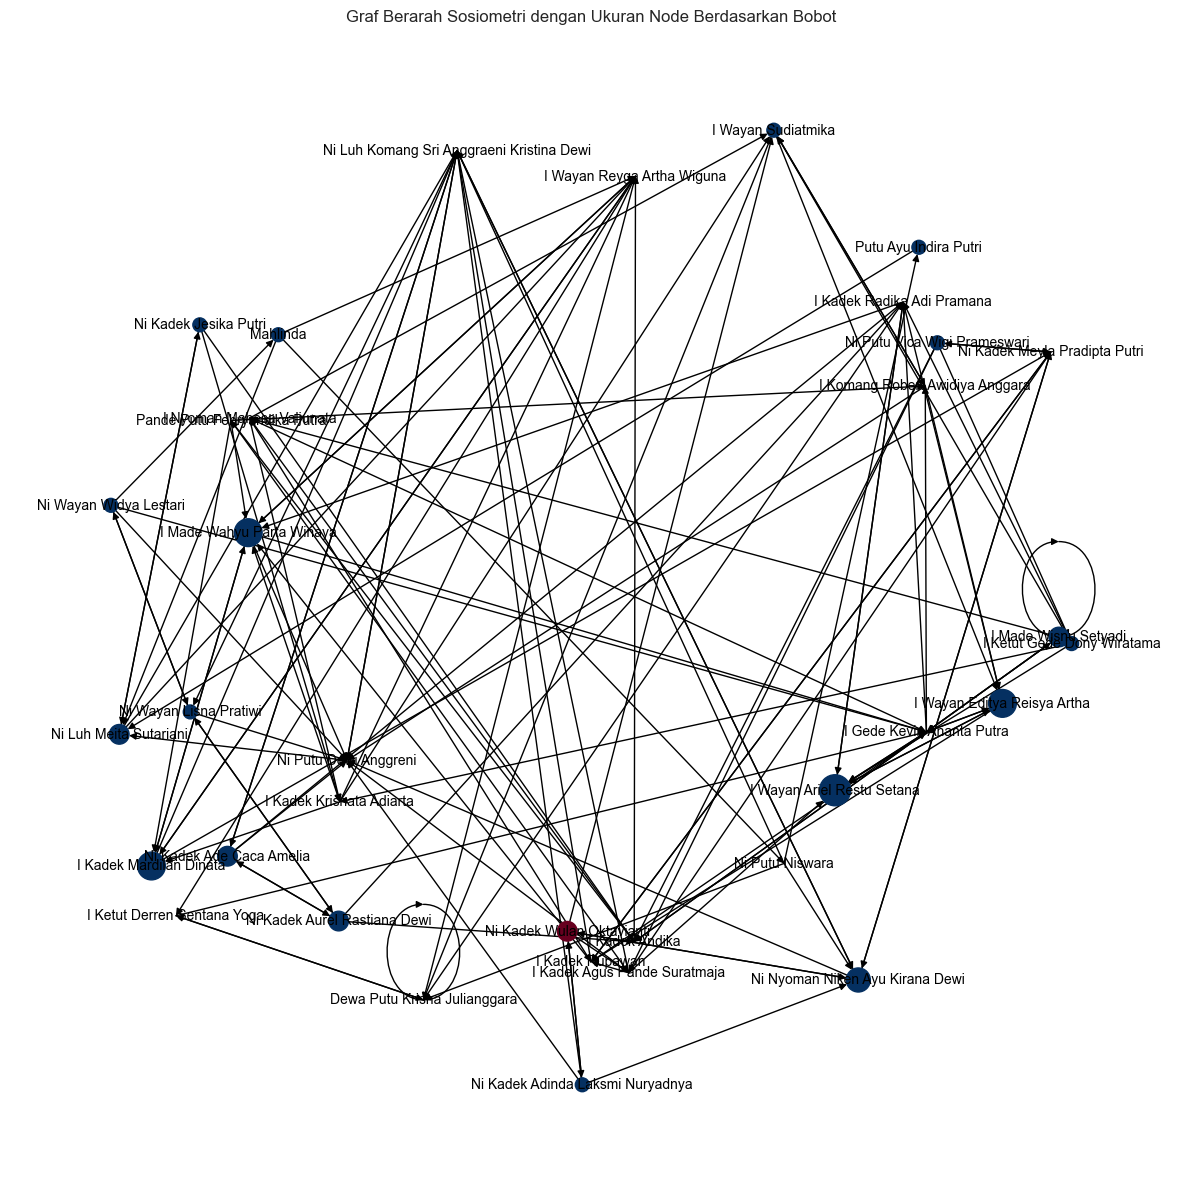

CPU times: user 3.35 s, sys: 266 ms, total: 3.62 s
Wall time: 3.87 s


In [25]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [26]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 16 µs, sys: 20 µs, total: 36 µs
Wall time: 29.8 µs


In [27]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 324 µs, sys: 2 µs, total: 326 µs
Wall time: 337 µs


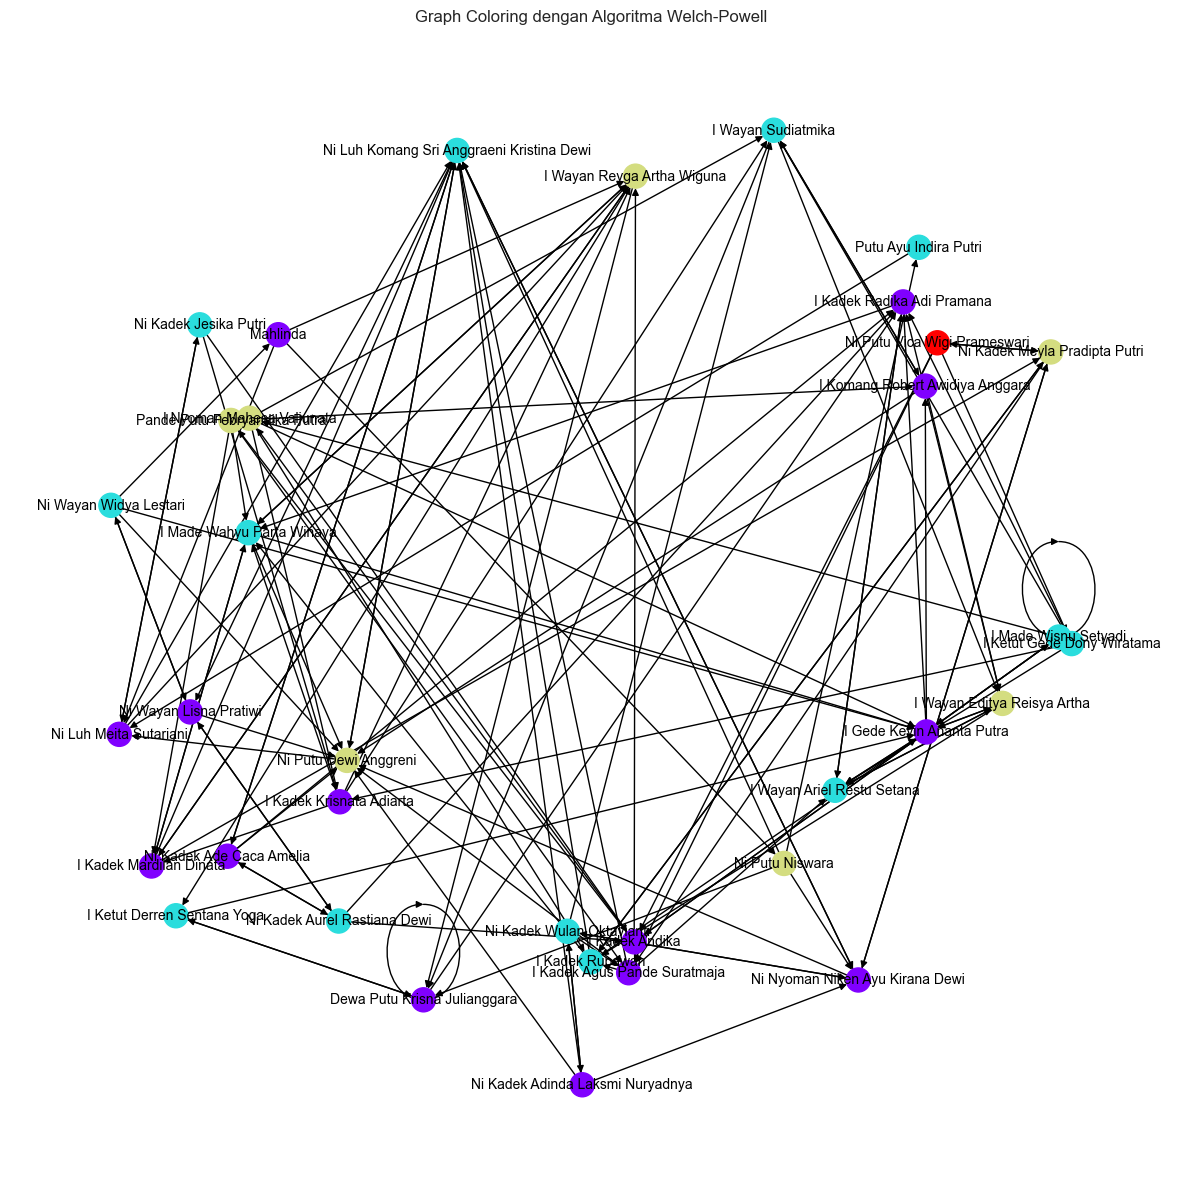

CPU times: user 4.07 s, sys: 295 ms, total: 4.37 s
Wall time: 4.52 s


In [28]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


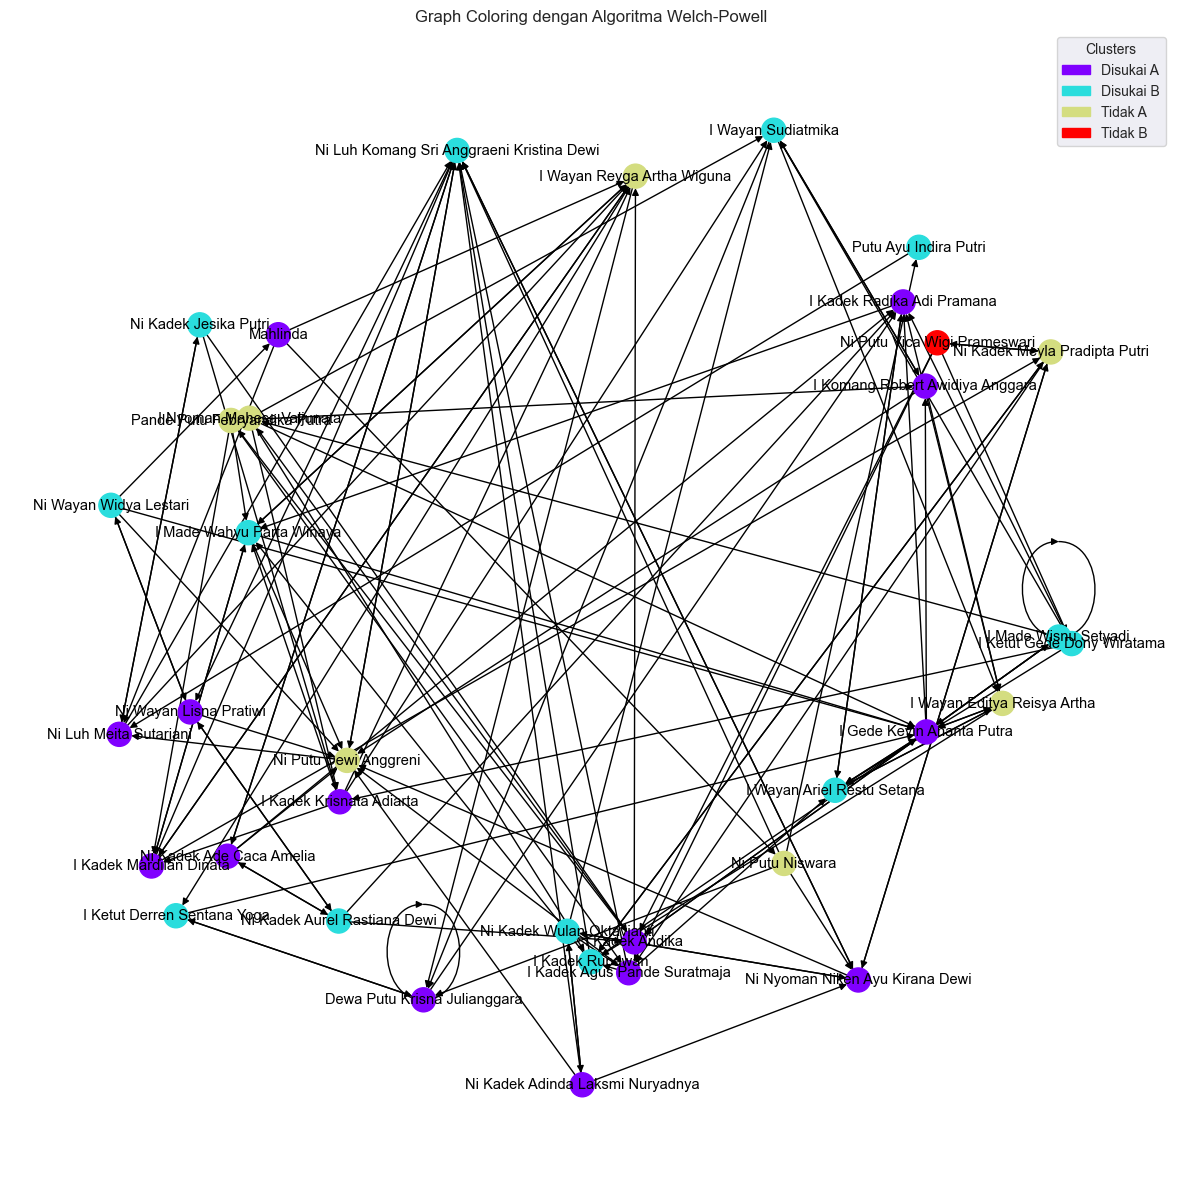

CPU times: user 7.72 s, sys: 337 ms, total: 8.06 s
Wall time: 8.11 s


In [29]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

# ax.legend(handles=handles, title='Clusters')
plt.show()


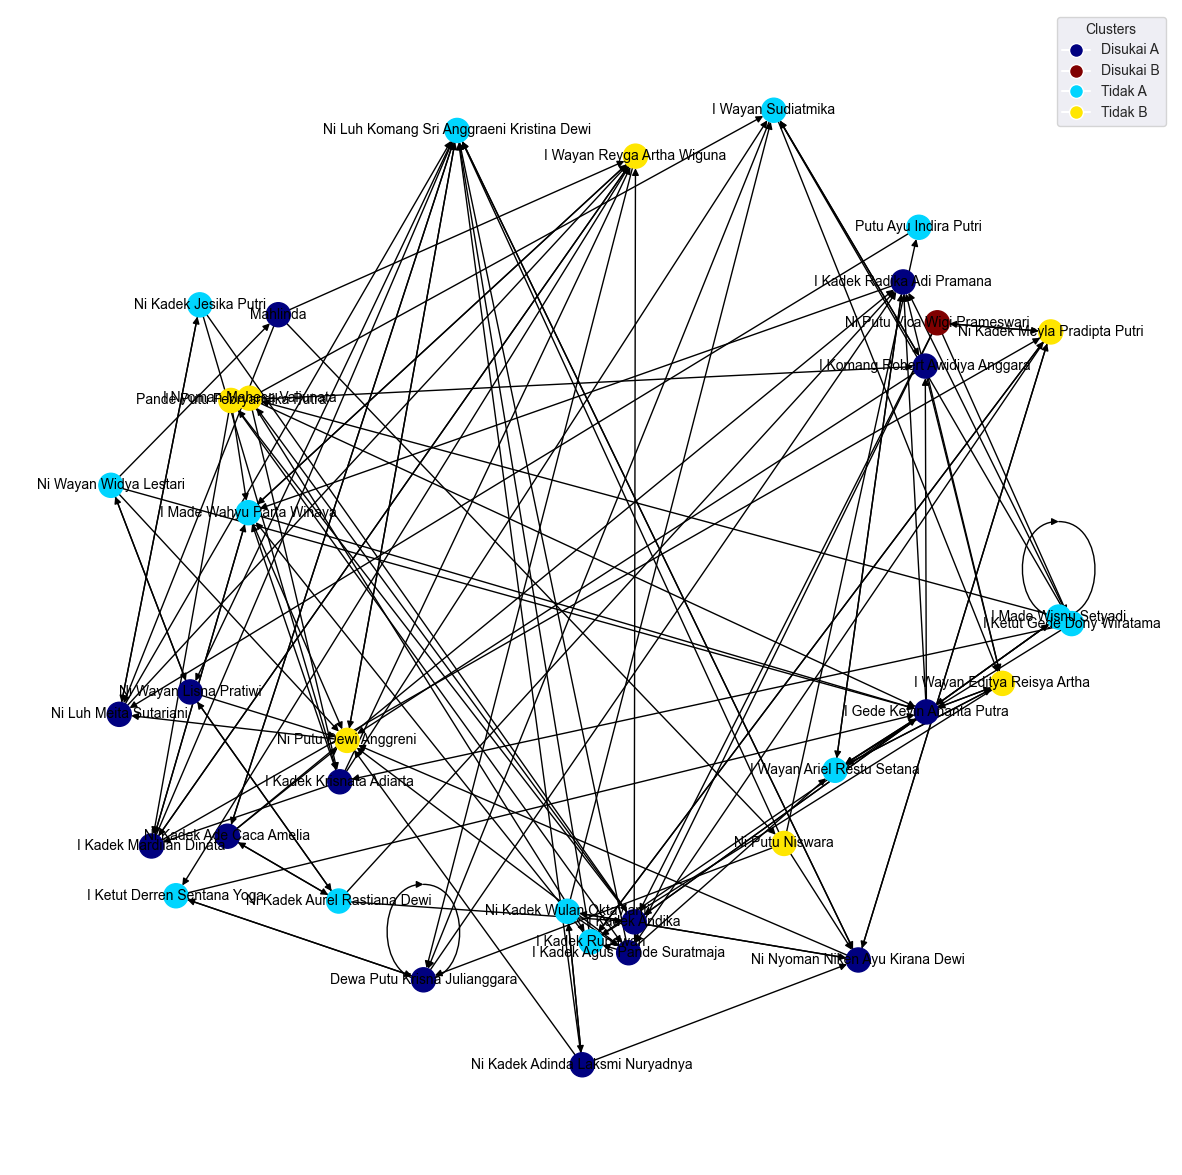

CPU times: user 7.21 s, sys: 328 ms, total: 7.54 s
Wall time: 7.24 s


In [30]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

# ax.legend(handles=handles, title="Clusters")

plt.show()

In [31]:
file_path = "./sociometryclustering/Processed Data J.csv"
df = pd.read_csv(file_path)
df

,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/10/2023 20:13:46,putud2179@gmail.com,Dewa Putu Krisna Julianggara,1,VII J,Dewa Putu Krisna Julianggara,1,I Ketut Derren Sentana Yoga,Dia baik,I Kadek Radika Adi Pramana,Dia marah kalo di enjek balik,I Kadek Radika Adi Pramana,Selalu mengejek
1,5/10/2023 20:12:43,kevinjelek633@gmail.com,I Gede Kevin Ananta Putra,2,VII J,I Wayan Ariel Restu Setana,Dia Gak Baperan,I Wayan Editya Reisya Artha,Sering ngajak buat tugas bareng,I Komang Robert Awidiya Anggara,Dia marah kalau di ejek balik,I Kadek Radika Adi Pramana,Dia selalu nampar nampar punggung
2,5/11/2023 21:06:43,putudewidewisri@gmail.com,I Kadek Agus Pande Suratmaja,3,VII J,I Wayan Ariel Restu Setana,Ramah,I Kadek Rupawan,Peduli,Ni Luh Komang Sri Anggraeni Kristina Dewi,Cerewet,Ni Putu Dewi Anggreni,Sok
3,6/23/2023 20:33:07,nikomangsulastriasih@gmail.com,I Kadek Andika,4,VII J,I Made Wisnu Setyadi,seru kalau diajak bercanda,I Nyoman Mahesa Valjunata,karena dia baik,I Wayan Reyga Artha Wiguna,sombong,Pande Putu Febryandika Putra,karea dia receh
4,5/8/2023 22:32:04,adinata0876@gmail.com,I Kadek Krisnata Adiarta,5,VII J,I Kadek Mardilan Dinata,"Karena saya suka dengan dia , dengan pembicara...",I Made Wahyu Parta Winaya,Karena dia selalu membantu saya,I Wayan Reyga Artha Wiguna,Dia asik dan tidak pemalss,I Wayan Sudiatmika,Dia baikk dan asik
5,6/23/2023 20:35:11,nikomangsulastriasih@gmail.com,I Kadek Mardilan Dinata,6,VII J,I Made Wahyu Parta Winaya,suka buat saya tertawa dan orangnya baik,I Wayan Reyga Artha Wiguna,"orangnya baik, meski agak sombong",Ni Kadek Meyla Pradipta Putri,suka ribut dikelas,Ni Luh Komang Sri Anggraeni Kristina Dewi,suka cari perhatian di kelas
6,5/15/2023 18:12:44,radikakadek4@gmail.com,I Kadek Radika Adi Pramana,7,VII J,I Wayan Ariel Restu Setana,Tidak suka mengejek,I Made Wahyu Parta Winaya,Sering mengejek,I Made Wahyu Parta Winaya,Sering mengejek,I Made Wahyu Parta Winaya,Sering mengejek
7,6/23/2023 20:36:48,nikomangsulastriasih@gmail.com,I Kadek Rupawan,8,VII J,I Gede Kevin Ananta Putra,karena dia baik,I Made Wahyu Parta Winaya,karena membuat tertawa,Ni Kadek Meyla Pradipta Putri,karena sering ribut di kelas,Ni Luh Komang Sri Anggraeni Kristina Dewi,karena cerewet
8,5/10/2023 8:48:26,derrenketut3@gmail.com,I Ketut Derren Sentana Yoga,9,VII J,Dewa Putu Krisna Julianggara,"asik, dan bisa di ajak bercanda",Dewa Putu Krisna Julianggara,"asik, dan bisa di ajak bercanda",I Gede Kevin Ananta Putra,tidak suka dengan caranya berteman,I Gede Kevin Ananta Putra,tidak suka dengan cara dan sikap nya dalam ber...
9,5/13/2023 18:32:08,madepada1@gmail.com,I Ketut Gede Dony Wiratama,10,VII J,I Wayan Sudiatmika,Baik,I Wayan Ariel Restu Setana,Pintar dan baik,I Kadek Krisnata Adiarta,Jahil,I Kadek Radika Adi Pramana,Suka yontek


In [32]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

,Nama siswa/i yang disukai,Frekuensi disukai,Nama siswa/i yang tidak disukai,Frekuensi tidak disukai
0,Ni Luh Meita Sutariani,7.0,Ni Luh Komang Sri Anggraeni Kristina Dewi,10.0
1,I Made Wahyu Parta Winaya,6.0,I Kadek Radika Adi Pramana,9.0
2,I Wayan Ariel Restu Setana,5.0,Ni Putu Dewi Anggreni,9.0
3,I Wayan Editya Reisya Artha,4.0,I Gede Kevin Ananta Putra,6.0
4,Ni Nyoman Niken Ayu Kirana Dewi,4.0,I Wayan Reyga Artha Wiguna,4.0
5,Dewa Putu Krisna Julianggara,4.0,I Kadek Agus Pande Suratmaja,4.0
6,I Kadek Mardilan Dinata,4.0,I Kadek Krisnata Adiarta,3.0
7,I Wayan Sudiatmika,3.0,I Komang Robert Awidiya Anggara,3.0
8,I Gede Kevin Ananta Putra,3.0,Dewa Putu Krisna Julianggara,3.0
9,I Wayan Reyga Artha Wiguna,3.0,I Kadek Andika,3.0
